In [1]:
from sklearn.datasets import make_regression, make_classification, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


# Regression

## Setting up X and y

In [2]:
X,y= make_regression(n_samples=10000, n_features=20,random_state=42) # create a fake regression

## Train/Test Split

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

## `StandardScaler`

In [4]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

## Keras Model

In [5]:
X_train.shape

(7500, 20)

In [24]:
model=Sequential()
model.add(Dense(20,activation='relu',input_dim=X_train.shape[1])) # sets up the hidden layer
model.add(Dense(10,activation='relu'))
model.add(Dense(1)) # output layer

## Compiling

- loss function
- optimizer

In [25]:
model.compile(loss='mean_squared_error',optimizer='adam') # alwasy pick adam

## Fitting

In [26]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=100) # added the test sets to validate  

Train on 7500 samples, validate on 2500 samples
Epoch 1/30
7500/7500 [==============================] - 0s 59us/step - loss: 0.7646 - val_loss: 0.3400
Epoch 2/30
7500/7500 [==============================] - 0s 23us/step - loss: 0.2612 - val_loss: 0.2112
Epoch 3/30
7500/7500 [==============================] - 0s 22us/step - loss: 0.1833 - val_loss: 0.1637
Epoch 4/30
7500/7500 [==============================] - 0s 22us/step - loss: 0.1491 - val_loss: 0.1400
Epoch 5/30
7500/7500 [==============================] - 0s 21us/step - loss: 0.1312 - val_loss: 0.1258
Epoch 6/30
7500/7500 [==============================] - 0s 19us/step - loss: 0.1207 - val_loss: 0.1169
Epoch 7/30
7500/7500 [==============================] - 0s 20us/step - loss: 0.1136 - val_loss: 0.1103
Epoch 8/30
7500/7500 [==============================] - 0s 20us/step - loss: 0.1079 - val_loss: 0.1054
Epoch 9/30
7500/7500 [==============================] - 0s 21us/step - loss: 0.1035 - val_loss: 0.1016
Epoch 10/30
7500/7500 [==

## Making predictions

In [9]:
model.predict(X_test)

array([[  46.290806],
       [ 120.41779 ],
       [ 340.58105 ],
       ...,
       [ 220.00803 ],
       [ 166.45573 ],
       [-287.46686 ]], dtype=float32)

# Binary Classification

## Train/Test Split + Scaling

In [10]:
X, y = make_classification(n_samples=10000, n_features=20, random_state=42)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [12]:
y_train.mean()

0.49946666666666667

In [13]:
SS=StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_test)

array([[ 0.69357038,  0.84641096,  1.56192168, ..., -1.68764223,
         1.46785723,  0.54732138],
       [ 0.65175054,  0.34222599, -2.19955382, ...,  0.52890499,
        -0.7367943 , -0.93352669],
       [ 1.31481216,  0.87106596,  0.37190012, ...,  0.05495774,
         0.26208964, -1.30598539],
       ...,
       [ 0.88937402,  0.9544647 , -1.27872492, ...,  2.02849079,
         0.57431893,  0.2836058 ],
       [ 0.01266585, -0.00662172,  0.36479828, ...,  1.65873752,
         2.18107233, -0.0605481 ],
       [ 1.12601047,  1.41427483, -0.01254065, ...,  0.34362974,
         0.92245779,  1.0167871 ]])

## Creating your model

In [29]:
model=Sequential()
model.add(Dense(20,activation='relu',input_dim=X_train.shape[1])) 
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # output layer # in classification models sigmoid needs to be used 

## Compiling

- loss
- optimizer
- optional: metrics

In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=40,batch_size=100) # added the test sets to validate  

Train on 7500 samples, validate on 2500 samples
Epoch 1/40
7500/7500 [==============================] - 1s 77us/step - loss: 0.6236 - acc: 0.6617 - val_loss: 0.5268 - val_acc: 0.7968
Epoch 2/40
7500/7500 [==============================] - 0s 22us/step - loss: 0.4319 - acc: 0.8340 - val_loss: 0.3496 - val_acc: 0.8696
Epoch 3/40
7500/7500 [==============================] - 0s 25us/step - loss: 0.3215 - acc: 0.8721 - val_loss: 0.2992 - val_acc: 0.8876
Epoch 4/40
7500/7500 [==============================] - 0s 23us/step - loss: 0.2960 - acc: 0.8845 - val_loss: 0.2836 - val_acc: 0.8936
Epoch 5/40
7500/7500 [==============================] - 0s 25us/step - loss: 0.2854 - acc: 0.8912 - val_loss: 0.2741 - val_acc: 0.8960
Epoch 6/40
7500/7500 [==============================] - 0s 21us/step - loss: 0.2765 - acc: 0.8956 - val_loss: 0.2649 - val_acc: 0.9016
Epoch 7/40
7500/7500 [==============================] - 0s 21us/step - loss: 0.2677 - acc: 0.9028 - val_loss: 0.2569 - val_acc: 0.9056
Epoch 8

## Fitting

In [32]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=40,batch_size=100)

Train on 7500 samples, validate on 2500 samples
Epoch 1/40
7500/7500 [==============================] - 0s 22us/step - loss: 0.2023 - acc: 0.9392 - val_loss: 0.2116 - val_acc: 0.9312
Epoch 2/40
7500/7500 [==============================] - 0s 22us/step - loss: 0.2015 - acc: 0.9397 - val_loss: 0.2119 - val_acc: 0.9320
Epoch 3/40
7500/7500 [==============================] - 0s 21us/step - loss: 0.2008 - acc: 0.9395 - val_loss: 0.2106 - val_acc: 0.9332
Epoch 4/40
7500/7500 [==============================] - 0s 22us/step - loss: 0.2000 - acc: 0.9396 - val_loss: 0.2108 - val_acc: 0.9316
Epoch 5/40
7500/7500 [==============================] - 0s 22us/step - loss: 0.1993 - acc: 0.9404 - val_loss: 0.2109 - val_acc: 0.9328
Epoch 6/40
7500/7500 [==============================] - 0s 20us/step - loss: 0.1988 - acc: 0.9401 - val_loss: 0.2107 - val_acc: 0.9324
Epoch 7/40
7500/7500 [==============================] - 0s 22us/step - loss: 0.1982 - acc: 0.9389 - val_loss: 0.2108 - val_acc: 0.9316
Epoch 8

## Using `history` to plot losses

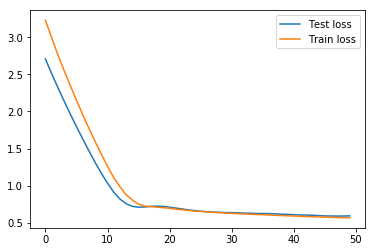

In [62]:
plt.plot(history.history['val_loss'], label='Test loss')
plt.plot(history.history['loss'], label='Train loss')
plt.legend();

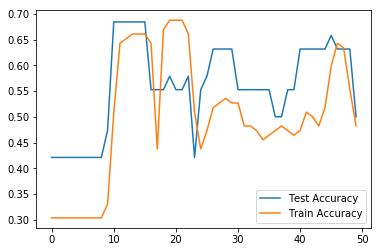

In [63]:
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.plot(history.history['acc'], label='Train Accuracy')
plt.legend();

# Multiclass Classification

## Data Prep

In [34]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [35]:
ss=StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_test)

array([[-9.93540349e-01,  1.01010609e+00, -1.16732019e+00,
        -7.30734879e-01],
       [ 2.35219018e+00, -6.16019524e-01,  1.74562560e+00,
         1.07650848e+00],
       [ 3.69535052e-01, -1.51412206e-01,  7.17527088e-01,
         8.18330858e-01],
       [ 4.93450997e-01, -2.00984148e+00,  4.89060752e-01,
         4.31064424e-01],
       [ 1.98044234e+00, -6.16019524e-01,  1.40292610e+00,
         9.47419669e-01],
       [ 2.35219018e+00,  1.70701706e+00,  1.74562560e+00,
         1.33468610e+00],
       [ 2.60002207e+00,  1.70701706e+00,  1.57427585e+00,
         1.07650848e+00],
       [ 1.23694667e+00,  3.13195111e-01,  1.28869293e+00,
         1.46377491e+00],
       [-2.21278474e-03, -8.48323182e-01,  1.46361247e-01,
         4.37979896e-02],
       [ 1.11303073e+00, -1.51412206e-01,  7.74643672e-01,
         6.89242047e-01],
       [-3.73960621e-01, -1.77753782e+00,  2.03477831e-01,
         1.72886801e-01],
       [-8.69624403e-01,  1.01010609e+00, -1.28155336e+00,
      

In [36]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

## Creating your model

In [37]:
X_train.shape

(112, 4)

In [56]:
model3 = Sequential()
model3.add(Dense(4, activation='relu', input_dim=4))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(3, activation='softmax'))  # one output neuron per class for multiclass

## Compiling your model

In [58]:
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Fitting

In [59]:
history=model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Train on 112 samples, validate on 38 samples
Epoch 1/50
112/112 [==============================] - 0s 4ms/step - loss: 3.2286 - acc: 0.3036 - val_loss: 2.7077 - val_acc: 0.4211
Epoch 2/50
112/112 [==============================] - 0s 106us/step - loss: 2.9952 - acc: 0.3036 - val_loss: 2.5109 - val_acc: 0.4211
Epoch 3/50
112/112 [==============================] - 0s 137us/step - loss: 2.7634 - acc: 0.3036 - val_loss: 2.3238 - val_acc: 0.4211
Epoch 4/50
112/112 [==============================] - 0s 128us/step - loss: 2.5526 - acc: 0.3036 - val_loss: 2.1423 - val_acc: 0.4211
Epoch 5/50
112/112 [==============================] - 0s 142us/step - loss: 2.3491 - acc: 0.3036 - val_loss: 1.9661 - val_acc: 0.4211
Epoch 6/50
112/112 [==============================] - 0s 137us/step - loss: 2.1524 - acc: 0.3036 - val_loss: 1.7963 - val_acc: 0.4211
Epoch 7/50
112/112 [==============================] - 0s 136us/step - loss: 1.9578 - acc: 0.3036 - val_loss: 1.6317 - val_acc: 0.4211
Epoch 8/50
112/112 

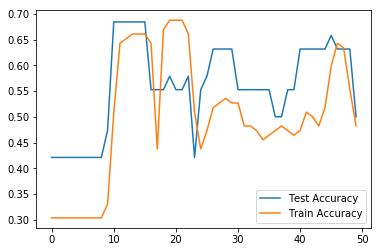

In [60]:
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.plot(history.history['acc'], label='Train Accuracy')
plt.legend();

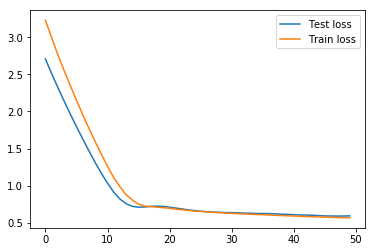

In [61]:
plt.plot(history.history['val_loss'], label='Test loss')
plt.plot(history.history['loss'], label='Train loss')
plt.legend();